In [1]:
try:
    %load_ext autoreload
    %autoreload 2
except:
        pass
%matplotlib ipympl
import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_condition_df as condition_df
import functions.et_make_df as  make_df
import be_load
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')

from functions import et_import
from functions import et_helper
import av

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/net/store/nbp/users/behinger/projects/etcomp/code


In [2]:
from functions.et_import import raw_pl_data
from lib.pupil.pupil_src.shared_modules import file_methods as pl_file_methods

from functions import nbp_recalib
tmp_dat = raw_pl_data(subject="VP24")
# recalib to get flgas whether stimulus was fused or not

In [99]:
print(et_helper.size_px2deg(30)) # markersize
print(et_helper.size_px2deg(30*0.24)) # white frame
print(et_helper.size_px2deg(1920)) # complete monitor
print(et_helper.size_px2deg((30*0.24 * 2 + 30))) # marker border (twice white frame + marker)

0.7906692095194855
0.1897634482824103
47.652506335381
1.170168324926919


In [104]:
print(et_helper.px2deg(0,orientation="horizontal"))

-24.902263459214705


In [6]:
tmp_dat['gaze_positions_recalib'] = nbp_recalib.nbp_recalib(tmp_dat)

Sorting pupil_positions
Calculating Recalibration Function
Calibration started at t=84740.69s and stopped at t=84763.68s, duration=23.00s
recalibrating for 3147.76s, 12529 samples
6
Calculating Recalibration Function
Calibration started at t=87877.73s and stopped at t=87911.45s, duration=33.72s
recalibrating for 89.21s, 21031 samples
6
Calculating Recalibration Function
Calibration started at t=87974.26s and stopped at t=88000.66s, duration=26.39s
recalibrating for 61.64s, 14615 samples
6
Calculating Recalibration Function
Calibration started at t=88039.22s and stopped at t=88062.30s, duration=23.08s
recalibrating for 623.16s, 146817 samples
6
Calculating Recalibration Function
Calibration started at t=88656.44s and stopped at t=88685.46s, duration=29.02s
recalibrating for 419.97s, 99055 samples
6
Calculating Recalibration Function
Calibration started at t=89081.71s and stopped at t=89105.43s, duration=23.72s
recalibrating for 62.01s, 14656 samples
6
Calculating Recalibration Function


In [8]:
gaze_topic = [p['topic'] for p in tmp_dat['gaze_positions_recalib']]

In [10]:
plt.plot([p['gx'] for p in tmp_dat['gaze_positions_recalib'][22115819:22115819+50]])

In [25]:
plt.figure()
plt.plot([p['norm_pos'][0] for p in tmp_dat['gaze_positions_recalib'][94100:(94100+100)]],'o-')

FigureCanvasNbAgg()

In [27]:
ix = range()

In [64]:
dat = pd.DataFrame(tmp_dat['gaze_positions_recalib'][94105:(94105+10)])
dat[['gx','gy']] = pd.DataFrame(dat.norm_pos.values.tolist(), index= dat.index)
dat[['base0','base1']] = pd.DataFrame(dat.base_data.values.tolist(), index= dat.index)

In [65]:
dat[['p0_x','p0_y']] = pd.DataFrame([p['norm_pos'] for p in dat.base0.values.tolist()], index= dat.index)
dat[['p1_x','p1_y']] = pd.DataFrame([p['norm_pos'] for p in dat.base1.values.tolist()], index= dat.index)
dat[['p0_timestamp']] = pd.DataFrame([p['timestamp'] for p in dat.base0.values.tolist()], index= dat.index)
dat[['p1_timestamp']] = pd.DataFrame([p['timestamp'] for p in dat.base1.values.tolist()], index= dat.index)


In [68]:
plt.figure()
# gaze-mapped land
plt.plot(dat.timestamp,dat.gx-dat.gx[0],'o-')
plt.plot(dat.timestamp,dat.p0_x-dat.p0_x[0],'o-')
plt.plot(dat.timestamp,dat.p1_x-dat.p1_x[0],'o-')

#pupil land
plt.plot(dat.p0_timestamp,dat.p0_x-dat.p0_x[0],'o-')
plt.plot(dat.p1_timestamp,dat.p1_x-dat.p1_x[0],'o-')
plt.legend(['both','both_p0','both_p1','true_p0','true_p1'])

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [3]:
etsamples,etevents,etmsgs = et_import.import_pl('VP3',recalib=False,surfaceMap=False)

/net/store/nbp/projects/etcomp/VP3/raw/pupil_data


ValueError: unregistered extension code 28847

In [264]:
A = np.array([[0,0],[0,0],[10,10]])
B = np.array([[0,0],[0,10],[0,0]])

In [242]:
locations = np.array([(*e, *f) for e,f in zip(A,B)])

In [243]:
from camera_models import load_intrinsics
intrinsics = load_intrinsics('','Pupil Cam1 ID2',(1280, 720))
width,height = intrinsics.resolution


In [244]:
locations[:, ::2] *=width
locations[:, 1::2] = (1. - locations[:, 1::2]) * height
undistorted = intrinsics.unprojectPoints(locations)
undistorted.shape = -1, 2

In [245]:
undistorted_3d = np.ones((undistorted.shape[0], 3))  # shape: 2n x 3
undistorted_3d[:, :-1] = undistorted

undistorted_3d /= np.linalg.norm(undistorted_3d, axis=1)[:, np.newaxis]

# Cosine distance of A and B: (A @ B) / (||A|| * ||B||)
# No need to calculate norms, since A and B are normalized in our case.
# np.einsum('ij,ij->i', A, B) equivalent to np.diagonal(A @ B.T) but faster.
angular_err = np.einsum('ij,ij->i', undistorted_3d[::2, :], undistorted_3d[1::2, :])

np.rad2deg(np.arccos(angular_err.clip(-1.0, 1.0)))

In [265]:
from functions.et_make_df import calc_3d_angle_points
location = np.array([(*e, *f) for e,f in zip(A,B)])
location

array([[ 0,  0,  0,  0],
       [ 0,  0,  0, 10],
       [10, 10,  0,  0]])

In [266]:
[calc_3d_angle_points(l[0], l[1], l[2], l[3]) for l in location]

In [351]:
x_0,y_0 = 0,0
x_1,y_1 = 90,90
calc_3d_angle_points(x_0,y_0,x_1,y_1)

90.00000000000001

In [349]:
pi = np.pi
vec1 = sph2cart(x_0/360*2*pi+pi/2, y_0/360*2*pi+pi/2)
vec2 = sph2cart(x_1/360*2*pi+pi/2, y_1/360*2*pi+pi/2)

In [350]:
# pupillabs : precision = np.sqrt(np.mean(np.rad2deg(np.arccos(succesive_distances.clip(-1., 1.))) ** 2))
cosdistance = np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
angle = np.arccos(np.clip(cosdistance,-1., 1.))
angle = angle * 360/(2*pi) # radian to degree

angle

90.00000000000001

In [341]:
np.sqrt(2)

1.4142135623730951

In [222]:
from functions.et_preprocess import preprocess_et

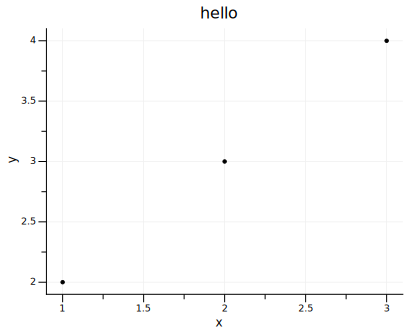

<ggplot: (8728851316635)>

In [14]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib
from plotnine import *
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['svg.fonttype'] = 'none'

matplotlib.rcParams['font.sans-serif'] = "Helvetica Neue LT Pro"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
from functions import plotnine_theme
ggplot(pd.DataFrame({'x':[1,2,3],'y':[2,3,4]},columns=['x','y']),aes(x='x',y='y'))+geom_point()+ggtitle('hello')

In [7]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [21]:
matplotlib.rcParams['svg.fonttype'] = 'path'

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.subplot(111, facecolor='w')

font0 = FontProperties()
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}
# Show family options

families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']

font1 = font0.copy()
font1.set_size('large')

t = plt.text(-0.8, 0.9, 'family', fontproperties=font1,
             **alignment)

yp = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

for k, family in enumerate(families):
    font = font0.copy()
    font.set_family(family)
    t = plt.text(-0.8, yp[k], family, fontproperties=font,
                 **alignment)

# Show style options

styles = ['normal', 'italic', 'oblique']

t = plt.text(-0.4, 0.9, 'style', fontproperties=font1,
             **alignment)

for k, style in enumerate(styles):
    font = font0.copy()
    font.set_family('sans-serif')
    font.set_style(style)
    t = plt.text(-0.4, yp[k], style, fontproperties=font,
                 **alignment)

# Show variant options

variants = ['normal', 'small-caps']

t = plt.text(0.0, 0.9, 'variant', fontproperties=font1,
             **alignment)

for k, variant in enumerate(variants):
    font = font0.copy()
    font.set_family('serif')
    font.set_variant(variant)
    t = plt.text(0.0, yp[k], variant, fontproperties=font,
                 **alignment)

# Show weight options

weights = ['light', 'medium', 'semibold', 'bold', 'heavy', 'black']

t = plt.text(0.4, 0.9, 'weight', fontproperties=font1,
             **alignment)

for k, weight in enumerate(weights):
    font = font0.copy()
    font.set_weight(weight)
    t = plt.text(0.4, yp[k], weight, fontproperties=font,
                 **alignment)

# Show size options

sizes = ['xx-small', 'x-small', 'small', 'medium', 'large',
         'x-large', 'xx-large']

t = plt.text(0.8, 0.9, 'size', fontproperties=font1,
             **alignment)

for k, size in enumerate(sizes):
    font = font0.copy()
    font.set_size(size)
    t = plt.text(0.8, yp[k], size, fontproperties=font,
                 **alignment)

# Show bold italic

font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('x-small')
t = plt.text(-0.4, 0.1, 'bold italic', fontproperties=font,
             **alignment)

font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('medium')
t = plt.text(-0.4, 0.2, 'bold italic', fontproperties=font,
             **alignment)

font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('x-large')
t = plt.text(-0.4, 0.3, 'bold italic', fontproperties=font,
             **alignment)

plt.axis([-1, 1, 0, 1])

plt.show()

In [23]:
matplotlib.font_manager.fontManager.ttflist

[<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>,
 <Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>,
 <Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>,
 <Font 'STIXGeneral' (STI

In [10]:
etsamples,etevents,etmsgs = preprocess_et(et='pl',subject='VP3')

/net/store/nbp/projects/etcomp/VP3/raw/pupil_data
Sorting pupil_positions
Calculating Recalibration Function
Calibration started at t=340922.19s and stopped at t=340984.78s, duration=62.59s
recalibrating for 905.39s, 212095 samples
6
<function calibrate_and_map at 0x7f8bf2c58268>
Mapping..0%
Mapping..47%
Mapping..94%
Mapping complete
Calculating Recalibration Function
Calibration started at t=341786.28s and stopped at t=341890.17s, duration=103.89s


KeyboardInterrupt: 

In [55]:
etmsgs.rms.describe()

count    3401.000000
mean        0.032407
std         0.024948
min         0.007167
25%         0.021396
50%         0.029084
75%         0.039082
max         0.915309
Name: rms, dtype: float64

In [54]:
etmsgs.sd.describe()

count    3401.000000
mean        0.302468
std         0.671317
min         0.021574
25%         0.135150
50%         0.194423
75%         0.293967
max        27.265110
Name: sd, dtype: float64

In [17]:
# add labels blink and saccade information from the event df  to sample df
etsamples = et_helper.add_events_to_samples(etsamples, etevents)

In [17]:
# get all nan index (not a blink neither a saccade) and pupil has to be detected and no negative time
ix_fix = pd.isnull(etsamples.type) & (etsamples.zero_pa==False)  & (etsamples.neg_time==False)
# mark them as fixations
etsamples.loc[ix_fix, 'type'] = 'fixation'

# use magic to get start and end times of fixations in a temporary column
etsamples['tmp_fix'] = ((1*(etsamples['type'] == 'fixation')).diff())
etsamples['tmp_fix'].iloc[0] = 0
etsamples['tmp_fix'] = etsamples['tmp_fix'].astype(int)

# first sample should be fix start?
if etsamples['tmp_fix'][np.argmax(etsamples['tmp_fix'] != 0)] == -1:  #argmax stops at first true
    # if we only find an fixation end, add a start at the beginning
    etsamples.iloc[0, etsamples.columns.get_loc('tmp_fix')] = 1



# make a list of the start and end times
start_times_list = list(etsamples.loc[etsamples['tmp_fix'] == 1, 'smpl_time'].astype(float))
end_times_list   = list(etsamples.loc[etsamples['tmp_fix'] == -1, 'smpl_time'].astype(float))

if len(start_times_list) == len(end_times_list)+1:
    # drop the last one if not finished
    start_times_list = start_times_list[0:-1]

# drop the temporary column
etsamples.drop('tmp_fix', axis=1, inplace=True)

# add them as columns to a fixationevent df
fixationevents = pd.DataFrame([start_times_list, end_times_list], ['start_time', 'end_time']).T

# delete event if start or end is NaN
fixationevents.dropna(subset=['start_time', 'end_time'], inplace=True)

# add the type    
fixationevents['type'] = 'fixation'
fixationevents['duration'] = fixationevents['end_time'] - fixationevents['start_time']

# delete fixationevents shorter than 50 ms
logger.warning("Deleted %s fixationsevents of %s fixationsevents in total cause they were shorter than 50ms", np.sum(fixationevents.duration <= 0.05), len(fixationevents))
fixationevents = fixationevents[fixationevents.duration > 0.05]

AttributeError: 'DataFrame' object has no attribute 'type'

In [25]:
etsamples, etmsgs,etevents = et_helper.load_file('el','VP3',cleaned=False)

In [58]:
from lib.pupil.pupil_src.shared_modules import file_methods as pl_file_methods
data = pl_file_methods.load_object('/net/store/nbp/projects/IntoTheWild/Daten/Eyetracking/Wild/VP21/2018_05_24/001/offline_data/offline_calibration_gaze')

In [64]:
data

{'circle_marker_positions': [],
 'manual_ref_positions': [{'index': 1626,
   'index_range': [1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630],
   'norm_pos': [0.5128342245989305, 0.5428286852589641],
   'screen_pos': [656.427807486631, 329.1633466135458],
   'timestamp': 1397.715},
  {'index': 1860,
   'index_range': [1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864],
   'norm_pos': [0.5192513368983958, 0.704183266932271],
   'screen_pos': [664.6417112299466, 212.98804780876495],
   'timestamp': 1403.227461},
  {'index': 1989,
   'index_range': [1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993],
   'norm_pos': [0.40160427807486626, 0.6364541832669321],
   'screen_pos': [514.0534759358288, 261.7529880478088],
   'timestamp': 1407.449771},
  {'index': 2244,
   'index_range': [2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248],
   'norm_pos': [0.339572192513369, 0.46513944223107573],
   'screen_pos': [434.65240641711233, 385.0996015936255],
   'time

In [63]:
data['circle_marker_positions']

[]

In [9]:
etevents.loc[:,'duration'] = etevents.end_time - etevents.start_time #24 is a 0.0 duratio blink

In [36]:
et_helper.plot_around_event(etsamples,etmsgs,etevents,etevents.query("type=='blink'").iloc[24],plusminus=(-2,5))

In [57]:
plsamples,plevents,plmsgs = et_import.import_pl(subject='VP3',recalib=False,surfaceMap=False)

fixing lag (at t=0) of :15043.10ms, slope of 0.9999556 (in a perfect world this is 0ms & 1.0)


In [ ]:
1

In [3]:
original_pldata = et_import.raw_pl_data(subject)

        

In [2]:
from functions import pl_surface
folder = '/net/store/nbp/projects/etcomp/VP3/raw'
fake_gpool = pl_surface.fake_gpool_surface(folder)


In [3]:
import functions.add_path
import numpy as np
import time

import os
import av # important to load this library before pupil-library! (even though we dont use it...)

from lib.pupil.pupil_src.shared_modules import offline_surface_tracker

tracker = offline_surface_tracker.Offline_Surface_Tracker(fake_gpool,min_marker_perimeter=30,robust_detection=False)

In [17]:
from offline_reference_surface import Offline_Reference_Surface

surface = Offline_Reference_Surface(tracker.g_pool)    

In [18]:
    
    
    # First define the markers that should be used for the surface
    # find a frame where there are 16 markers and all of them have high confidence
    ix = 0
    while True:
        if len(tracker.cache[ix]) == 16:
            usable_markers = [m for m in tracker.cache[ix] if m['id_confidence'] >= 0.8]
            if len(usable_markers) == 16:
                break
        ix +=1
    

In [19]:
    
    # Step 3
    # This dissables pupil-labs functionality. They ask for 90 frames with the markers. but because we know there will be 16 markers, we dont need it (toitoitoi)
    print('Defining & Finding Surface')
    surface.required_build_up = 1
    surface.build_correspondence(tracker.cache[ix],0.3,0.7)
    if not surface.defined:
        raise('Oh oh trouble ahead. The surface was not defined')

Defining & Finding Surface


In [20]:
type(tracker.cache)

cache_list.Cache_List

In [21]:
surface._get_location(tracker.cache[0],0.3,0.7)

{'camera_pose_3d': None,
 'detected': True,
 'detected_markers': 15,
 'm_from_screen': array([[ 1.97269843e+00,  3.59763043e-02, -4.25892026e-01],
        [-1.05376419e-02,  2.04941301e+00, -1.79665459e-01],
        [ 3.66566051e-04,  5.13367512e-02,  1.00000000e+00]]),
 'm_from_undistored_norm_space': array([[ 1.07782162,  0.04932309,  0.59322138],
        [-0.07882593, -1.90855759,  0.78327217],
        [-0.09014225,  0.08480887,  1.        ]]),
 'm_to_screen': array([[ 5.09153516e-01, -1.43053670e-02,  2.14274243e-01],
        [ 2.58994002e-03,  4.87937455e-01,  8.87685418e-02],
        [-3.19597500e-04, -2.50438799e-02,  1.00000000e+00]]),
 'm_to_undistored_norm_space': array([[ 9.61953058e-01, -4.86342885e-04, -5.70268620e-01],
        [-4.00534079e-03, -5.51003801e-01,  4.33960091e-01],
        [ 8.70683862e-02,  4.67794016e-02,  1.00000000e+00]])}

In [26]:
surface.init_cache(tracker.cache,0.3,0.7)
    

KeyboardInterrupt: 

In [ ]:
    # Step 4
    tracker.surfaces = [surface];

In [25]:
tracker

In [9]:
from functions import pl_surface
datapath = '/net/store/nbp/projects/etcomp/'
subject = 'VP3'
folder= os.path.join(datapath,subject,'raw')

In [11]:
tracker = pl_surface.map_surface(folder,loadSurface=False,loadCache=True)   

Starting Tracker - WARNING: ROBUST_DETECTION IS CURRENTLY FALSE


No surfaces defined.


Finding Markers
Nothing to do, waiting...
1.0
Adding a surface
Defining & Finding Surface


TypeError: 'NoneType' object is not subscriptable

In [12]:
tracker

NameError: name 'tracker' is not defined

In [8]:
tracker = pl_surface.map_surface(folder,loadSurface=True)   

Starting Tracker - WARNING: ROBUST_DETECTION IS CURRENTLY FALSE


No gaze on any surface for this section!


Surface already defined, loadSurface=TRUE, thus returning tracker


In [29]:
    
    # use pupilhelper func to make samples df (confidence, gx, gy, smpl_time, diameter)
pldata = et_helper.gaze_to_pandas(original_pldata['gaze_positions'])

In [61]:
p_unproj = intrinsics.unprojectPoints(p,use_distortion=True)

In [62]:
p_proj = intrinsics.projectPoints(p_unproj,use_distortion=True)
p_proj_nodist = intrinsics.projectPoints(p_unproj,use_distortion=False)

In [67]:
plt.figure()
#plt.plot(p[:,0],p[:,1],'go')
plt.plot(p_unproj[:,0],p_unproj[:,1],'ro')
#plt.plot(p_proj[:,0],p_proj[:,1],'bo')
#plt.plot(p_proj_nodist[:,0],p_proj_nodist[:,1],'ko')

FigureCanvasNbAgg()

In [41]:
# undistort gaze postitions
pldata.loc[:,'gx_px'] = pldata.loc[:,'gx']*(2/3.)*1920 + (1/6.*1920)
pldata.loc[:,'gy_px'] = pldata.loc[:,'gy']*(2/3.)*1080 + (1/6.*1080)
undistorted_gazepoint_array = intrinsics.unprojectPoints(pldata.loc[:, ['gx_px','gy_px']].values, use_distortion=True,normalize=False)
undistorted_gazepoint_array = intrinsics.projectPoints(undistorted_gazepoint_array, use_distortion=False)
pldata.loc[:,'gx_new'] = (undistorted_gazepoint_array[:,0]-(1/6.*1920)) /((2/3.)*1080)
pldata.loc[:,'gy_new'] = (undistorted_gazepoint_array[:,1]-(1/6.*1080)) /((2/3.)*1080)

NameError: name 'pldata' is not defined

FigureCanvasNbAgg()

In [105]:
plt.figure()
plt.plot(undistorted_gazepoint_array[1:10000,1])

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [106]:
ggplot(pldata.iloc[8000:8400])+geom_point(aes(x='gx',y='gy'),color='black')+geom_point(aes(x='gx_new',y='gy_new'),color='red')

In [130]:
import lib.pupil.pupil_src.shared_modules.file_methods as file_methods

In [132]:
file_methods.Incremental_Legacy_Pupil_Data_Loader('test')

## Testing many saccades in HMM

In [4]:
from functions.detect_events import make_blinks,make_saccades,make_fixations
from functions.detect_events_hmm import detect_events_hmm,detect_events_hmm_nosmooth    
import functions.et_preprocess as preprocess
etsamples, etmsgs, etevents = preprocess.preprocess_et('pl','VP11',load=False,save=False,eventfunctions=(make_blinks,detect_events_hmm_nosmooth),outputprefix='hmmnosmooth_')

In [66]:
etsamples, etmsgs, etevents = et_helper.load_file('el','VP3',cleaned=True)

In [98]:
import numpy as np

##################################
########### Parameters ###########
sampfreq = 500 #Hz
weights_name = os.path.abspath('../local/build/src_uneye/training/weights_Andersson')
min_sacc_dur = 6 # in ms
min_sacc_dist = 10 #in ms

# load data
Xtest = etsamples.gx.iloc[30000:32000]
Ytest = etsamples.gy.iloc[30000:32000]

In [101]:
import uneye
# Prediction
et_helper.tic()
model = uneye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur,
                min_sacc_dist=min_sacc_dist,classes=5)
et_helper.toc()
Prediction,Probability = model.predict(Xtest,Ytest)
et_helper.toc()

Elapsed time: 0.002357 seconds.

Elapsed time: 0.006639 seconds.



In [102]:

import matplotlib.pyplot as plt
# plot example

fig = plt.figure(figsize=(8,4))
plt.suptitle('Example Trial')
ax = fig.add_subplot(611)
x_trace = Xtest
y_trace = Ytest
plt.plot(x_trace,label='X position',c=[0,0.5,0.8])
plt.plot(y_trace,label='Y position',c=[0,0.8,0.3])
plt.xticks(())
plt.ylabel('Relative eye position (°)')
plt.legend()

labellist = ['fixation','saccade','pso','blink','other']

# prediction
for k in range(5):
    ax = fig.add_subplot(6,1,k+2)
    #plt.plot(Prediction,label='Binary prediction',c=[0,0.6,0.3])
    plt.plot(Probability[k,:],c='k',alpha=.3)
    plt.yticks((0,1),['',labellist[k]])


plt.show()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()